# Hospitalization Priority for COVID-19 patients

**Steps:**

1. Define problem statement
2. Load the dataset
3. Handle missing values
4. Find noise, outliers, skewness, type of distribution
5. Manage data type of attributes
6. Correlation with target attribute
7. Feature subset selection
8. Define conditions for classification/ multivariate analysis
9. Model selection
10. Train-test split
11. Fit model
12. Accuracy and results
13. Write paper





In [ ]:
import pandas as pd

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1rdAnZn0E2XVqlJXS9zGS-SrJQ7_gPVA-/view?usp=sharing'

In [ ]:
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('final_dataset.csv')

df = pd.read_csv('final_dataset.csv')
df

Unnamed: 0  Size  ...  non_severe_to_severe_time  non_severe_to_severe
0           697     1  ...                        NaN                     0
1           698     1  ...                        NaN                     0
2           699     1  ...                        NaN                     0
3           700     1  ...                        NaN                     0
4           701     1  ...                        NaN                     0
..          ...   ...  ...                        ...                   ...
596        1293     1  ...                        NaN                     0
597        1294     1  ...                        NaN                     0
598        1295     1  ...                        NaN                     0
599        1296     1  ...                        NaN                     0
600        1297     1  ...                        NaN                     0

[601 rows x 66 columns]

In [ ]:
df.shape

(601, 66)

In [ ]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0  Size  ...  non_severe_to_severe_time  non_severe_to_severe
0           697     1  ...                        NaN                     0
1           698     1  ...                        NaN                     0
2           699     1  ...                        NaN                     0
3           700     1  ...                        NaN                     0
4           701     1  ...                        NaN                     0
..          ...   ...  ...                        ...                   ...
596        1293     1  ...                        NaN                     0
597        1294     1  ...                        NaN                     0
598        1295     1  ...                        NaN                     0
599        1296     1  ...                        NaN                     0
600        1297     1  ...                        NaN                     0

[601 rows x 66 columns]>

In [ ]:
df.info

<bound method DataFrame.info of      Unnamed: 0  Size  ...  non_severe_to_severe_time  non_severe_to_severe
0           697     1  ...                        NaN                     0
1           698     1  ...                        NaN                     0
2           699     1  ...                        NaN                     0
3           700     1  ...                        NaN                     0
4           701     1  ...                        NaN                     0
..          ...   ...  ...                        ...                   ...
596        1293     1  ...                        NaN                     0
597        1294     1  ...                        NaN                     0
598        1295     1  ...                        NaN                     0
599        1296     1  ...                        NaN                     0
600        1297     1  ...                        NaN                     0

[601 rows x 66 columns]>

In [ ]:
#
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Unnamed: 0 0
Size 0
Interval 112
Degree_Severe 0
Degree_Nonsevere 0
Age 2
Sex_F 2
Sex_M 2
Underlying_comorbidities_Hypertension 123
Underlying_comorbidities_Endocrine_disease 123
Underlying_comorbidities_CVD 124
Underlying_comorbidities_Chronic_Lung_disease 124
Underlying_comorbidities_Digestive_Disease 124
Underlying_comorbidities_Renal_disease 124
Underlying_comorbidities_Tumor 124
Underlying_comorbidities_Cerebrovascular/Nervous_Disease 124
Underlying_comorbidities_Immune_disorder 124
Underlying_comorbidities_Others 124
Symptoms_Fever 23
Symptoms_Cough 122
Symptoms_Expectoration 498
Symptoms_Hemoptysis 498
Symptoms_Dyspnea 56
Symptoms_Catarrh 497
Symptoms_Fatigue 122
Symptoms_Anorexia 496
Symptoms_Nausea/Emesis 120
Symptoms_Myalgia 120
Symptoms_Dizziness/Headache 120
Symptoms_Pharyngalgia 496
Symptoms_Chest/back_pain 496
Symptoms_Chest_tightness 450
Symptoms_Abdominal_pain/diarrhea 496
Temperature_High 437
Temperature_Moderate 437
Temperature_Low 437
Laboratory_test_WBC 95
Laborator

In [ ]:
df.drop(['Symptoms_Anorexia','Symptoms_Pharyngalgia','Symptoms_Chest/back_pain','Symptoms_Chest_tightness','Symptoms_Abdominal_pain/diarrhea',
         'Temperature_High','Temperature_Moderate','Temperature_Low','Laboratory_test_HTI_(pg/ml)','Laboratory_test_PT_(s)','Laboratory_test_Lac_(mmol/L)',
         'Laboratory_test_IL_6_(pg/ml)','Laboratory_test_Lymphopenia','Laboratory_test_BUN_(mmol/L)','Troponin_I','consolidation_ratio%','ground_glass_opacity_ratio%'
         ,'non_severe_to_severe_time','Symptoms_Expectoration','Symptoms_Hemoptysis','Laboratory_test_ESR_(mm/hr)','Laboratory_test_PCT_(ng/ml)','Unnamed: 0','Symptoms_Catarrh','Size','source','Degree_Nonsevere','Sex_F','Interval','any_Underlying','any_Symptoms','non_severe_to_severe'],axis=1,inplace=True)

Columns to be removed:

Symptoms_Anorexia 496
Symptoms_Pharyngalgia 496
Symptoms_Chest/back_pain 496
Symptoms_Chest_tightness 450
Symptoms_Abdominal_pain/diarrhea 496
Temperature_High 437
Temperature_Moderate 437
Temperature_Low 437
Laboratory_test_HTI_(pg/ml) 589
Laboratory_test_PT_(s) 445
Laboratory_test_Lac_(mmol/L) 467
Laboratory_test_IL_6_(pg/ml) 600
Laboratory_test_Lymphopenia 545
Laboratory_test_BUN_(mmol/L) 579
Troponin_I 570
consolidation_ratio% 546
ground_glass_opacity_ratio% 546
non_severe_to_severe_time 581
Symptoms_Expectoration 498
Symptoms_Hemoptysis 498
Laboratory_test_ESR_(mm/hr) 326
Laboratory_test_PCT_(ng/ml) 415
Symptoms_Catarrh 497

In [ ]:
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Degree_Severe 0
Age 2
Sex_M 2
Underlying_comorbidities_Hypertension 123
Underlying_comorbidities_Endocrine_disease 123
Underlying_comorbidities_CVD 124
Underlying_comorbidities_Chronic_Lung_disease 124
Underlying_comorbidities_Digestive_Disease 124
Underlying_comorbidities_Renal_disease 124
Underlying_comorbidities_Tumor 124
Underlying_comorbidities_Cerebrovascular/Nervous_Disease 124
Underlying_comorbidities_Immune_disorder 124
Underlying_comorbidities_Others 124
Symptoms_Fever 23
Symptoms_Cough 122
Symptoms_Dyspnea 56
Symptoms_Fatigue 122
Symptoms_Nausea/Emesis 120
Symptoms_Myalgia 120
Symptoms_Dizziness/Headache 120
Laboratory_test_WBC 95
Laboratory_test_L 102
Laboratory_test_N 102
Laboratory_test_CRP_(mg/L) 147
Laboratory_test_CK_MB_(ng/ml) 221
Laboratory_test_D_dimer_(ug/ml) 211
Laboratory_test_ALT_(U/L) 202
Laboratory_test_AST_(U/L) 196
Laboratory_test_TB_(umol/L) 221
Laboratory_test_ALB_(g/L) 157
Laboratory_test_LDH_(U/L) 172
Laboratory_test_SCr_(umol/L) 156
CK 217
O2% 415


In [ ]:
df.dtypes

Degree_Severe                                                  bool
Age                                                         float64
Sex_M                                                       float64
Underlying_comorbidities_Hypertension                       float64
Underlying_comorbidities_Endocrine_disease                  float64
Underlying_comorbidities_CVD                                float64
Underlying_comorbidities_Chronic_Lung_disease               float64
Underlying_comorbidities_Digestive_Disease                  float64
Underlying_comorbidities_Renal_disease                      float64
Underlying_comorbidities_Tumor                              float64
Underlying_comorbidities_Cerebrovascular/Nervous_Disease    float64
Underlying_comorbidities_Immune_disorder                    float64
Underlying_comorbidities_Others                             float64
Symptoms_Fever                                              float64
Symptoms_Cough                                  

In [ ]:
df['O2%'].value_counts()

98.00     42
99.00     28
97.00     21
96.00     18
95.00     11
94.00      7
93.00      5
100.00     5
92.00      4
98.50      2
94.80      2
99.20      2
0.96       2
98.20      2
96.50      1
89.00      1
79.00      1
1.00       1
85.00      1
96.70      1
94.20      1
80.00      1
94.40      1
98.60      1
0.94       1
91.00      1
84.40      1
91.30      1
99.70      1
87.00      1
56.00      1
96.80      1
87.50      1
95.40      1
75.20      1
93.40      1
98.30      1
69.70      1
99.30      1
93.90      1
96.90      1
97.70      1
91.10      1
97.40      1
99.60      1
98.10      1
94.90      1
95.60      1
93.10      1
Name: O2%, dtype: int64

In [ ]:
df

Degree_Severe   Age  Sex_M  ...  Laboratory_test_SCr_(umol/L)    CK  O2%
0            False  40.0    0.0  ...                           NaN   NaN  NaN
1            False  74.0    0.0  ...                           NaN   NaN  NaN
2            False  73.0    0.0  ...                           NaN   NaN  NaN
3             True  66.0    0.0  ...                           NaN   NaN  NaN
4             True  67.0    1.0  ...                           NaN   NaN  NaN
..             ...   ...    ...  ...                           ...   ...  ...
596          False  47.0    0.0  ...                         37.75  71.0  NaN
597          False  31.0    1.0  ...                         51.92  57.5  NaN
598          False  35.0    0.0  ...                         28.93  41.3  NaN
599          False  41.0    0.0  ...                         39.95  22.7  NaN
600          False  65.0    0.0  ...                         37.82  63.2  NaN

[601 rows x 34 columns]

In [ ]:
import numpy as np
mode = df['O2%'].mode()[0]
x = df['O2%'].fillna(mode)
df['O2%'] = x

In [ ]:
df['O2%'].value_counts()

98.00     457
99.00      28
97.00      21
96.00      18
95.00      11
94.00       7
93.00       5
100.00      5
92.00       4
98.50       2
94.80       2
99.20       2
0.96        2
98.20       2
96.50       1
89.00       1
79.00       1
1.00        1
85.00       1
96.70       1
94.20       1
80.00       1
94.40       1
98.60       1
0.94        1
91.00       1
84.40       1
91.30       1
99.70       1
87.00       1
56.00       1
96.80       1
87.50       1
95.40       1
75.20       1
93.40       1
98.30       1
69.70       1
99.30       1
93.90       1
96.90       1
97.70       1
91.10       1
97.40       1
99.60       1
98.10       1
94.90       1
95.60       1
93.10       1
Name: O2%, dtype: int64

In [ ]:
df['O2%'].isna().sum()

0

In [ ]:
df.head()

Degree_Severe   Age  Sex_M  ...  Laboratory_test_SCr_(umol/L)  CK   O2%
0          False  40.0    0.0  ...                           NaN NaN  98.0
1          False  74.0    0.0  ...                           NaN NaN  98.0
2          False  73.0    0.0  ...                           NaN NaN  98.0
3           True  66.0    0.0  ...                           NaN NaN  98.0
4           True  67.0    1.0  ...                           NaN NaN  98.0

[5 rows x 34 columns]

Gender: Male = 1.0 Female = 0
Severity: Nonsevere = 0 Severe = 1

In [ ]:
df.rename(columns = {'Sex_M':'Gender','Degree_Severe':'Severity'}, inplace = True)

In [ ]:
df['Severity'].replace(False,0, inplace = True)

In [ ]:
df.head()

Severity   Age  Gender  ...  Laboratory_test_SCr_(umol/L)  CK   O2%
0       0.0  40.0     0.0  ...                           NaN NaN  98.0
1       0.0  74.0     0.0  ...                           NaN NaN  98.0
2       0.0  73.0     0.0  ...                           NaN NaN  98.0
3       1.0  66.0     0.0  ...                           NaN NaN  98.0
4       1.0  67.0     1.0  ...                           NaN NaN  98.0

[5 rows x 34 columns]

In [ ]:
df.columns

Index(['Severity', 'Age', 'Gender', 'Underlying_comorbidities_Hypertension',
       'Underlying_comorbidities_Endocrine_disease',
       'Underlying_comorbidities_CVD',
       'Underlying_comorbidities_Chronic_Lung_disease',
       'Underlying_comorbidities_Digestive_Disease',
       'Underlying_comorbidities_Renal_disease',
       'Underlying_comorbidities_Tumor',
       'Underlying_comorbidities_Cerebrovascular/Nervous_Disease',
       'Underlying_comorbidities_Immune_disorder',
       'Underlying_comorbidities_Others', 'Symptoms_Fever', 'Symptoms_Cough',
       'Symptoms_Dyspnea', 'Symptoms_Fatigue', 'Symptoms_Nausea/Emesis',
       'Symptoms_Myalgia', 'Symptoms_Dizziness/Headache',
       'Laboratory_test_WBC', 'Laboratory_test_L', 'Laboratory_test_N',
       'Laboratory_test_CRP_(mg/L)', 'Laboratory_test_CK_MB_(ng/ml)',
       'Laboratory_test_D_dimer_(ug/ml)', 'Laboratory_test_ALT_(U/L)',
       'Laboratory_test_AST_(U/L)', 'Laboratory_test_TB_(umol/L)',
       'Laboratory_test_A

In [ ]:
list1 = df[df.columns[3:20]]
list1

Underlying_comorbidities_Hypertension  ...  Symptoms_Dizziness/Headache
0                                      0.0  ...                          0.0
1                                      0.0  ...                          0.0
2                                      0.0  ...                          0.0
3                                      1.0  ...                          0.0
4                                      0.0  ...                          0.0
..                                     ...  ...                          ...
596                                    NaN  ...                          0.0
597                                    NaN  ...                          0.0
598                                    NaN  ...                          0.0
599                                    NaN  ...                          0.0
600                                    NaN  ...                          0.0

[601 rows x 17 columns]

In [ ]:
for name in list1.columns:
  x = df[name].fillna(0)
  df[name] = x

In [ ]:
df.dtypes

Severity                                                    float64
Age                                                         float64
Gender                                                      float64
Underlying_comorbidities_Hypertension                       float64
Underlying_comorbidities_Endocrine_disease                  float64
Underlying_comorbidities_CVD                                float64
Underlying_comorbidities_Chronic_Lung_disease               float64
Underlying_comorbidities_Digestive_Disease                  float64
Underlying_comorbidities_Renal_disease                      float64
Underlying_comorbidities_Tumor                              float64
Underlying_comorbidities_Cerebrovascular/Nervous_Disease    float64
Underlying_comorbidities_Immune_disorder                    float64
Underlying_comorbidities_Others                             float64
Symptoms_Fever                                              float64
Symptoms_Cough                                  

In [ ]:
median = df['Age'].median()
df['Age']= df['Age'].fillna(median)

In [ ]:
mode = df['Gender'].mode()
df['Gender'] = df['Gender'].fillna(mode)


In [ ]:
df.dtypes

Severity                                                    float64
Age                                                         float64
Gender                                                      float64
Underlying_comorbidities_Hypertension                       float64
Underlying_comorbidities_Endocrine_disease                  float64
Underlying_comorbidities_CVD                                float64
Underlying_comorbidities_Chronic_Lung_disease               float64
Underlying_comorbidities_Digestive_Disease                  float64
Underlying_comorbidities_Renal_disease                      float64
Underlying_comorbidities_Tumor                              float64
Underlying_comorbidities_Cerebrovascular/Nervous_Disease    float64
Underlying_comorbidities_Immune_disorder                    float64
Underlying_comorbidities_Others                             float64
Symptoms_Fever                                              float64
Symptoms_Cough                                  

In [ ]:
df.isnull().sum()

Severity                                                      0
Age                                                           0
Gender                                                        2
Underlying_comorbidities_Hypertension                         0
Underlying_comorbidities_Endocrine_disease                    0
Underlying_comorbidities_CVD                                  0
Underlying_comorbidities_Chronic_Lung_disease                 0
Underlying_comorbidities_Digestive_Disease                    0
Underlying_comorbidities_Renal_disease                        0
Underlying_comorbidities_Tumor                                0
Underlying_comorbidities_Cerebrovascular/Nervous_Disease      0
Underlying_comorbidities_Immune_disorder                      0
Underlying_comorbidities_Others                               0
Symptoms_Fever                                                0
Symptoms_Cough                                                0
Symptoms_Dyspnea                        

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df['Laboratory_test_WBC'][477] = 3.59
df['Laboratory_test_WBC'][477]

3.59

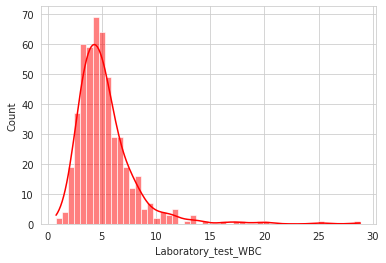

In [ ]:
sns.histplot(df['Laboratory_test_WBC'],bins=50,kde=True,color='r')
#since histplot is positively skewed so we are using median to fill the missing values

In [ ]:
df['Laboratory_test_WBC'].median()

4.74

In [ ]:
df['Laboratory_test_WBC'].fillna(df['Laboratory_test_WBC'].median(),inplace=True)

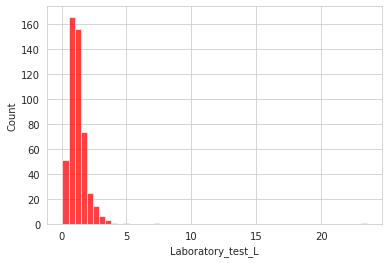

In [ ]:
sns.histplot(df['Laboratory_test_L'],bins=50,color='r')

In [ ]:
df['Laboratory_test_L'].fillna(df['Laboratory_test_L'].median(),inplace=True)

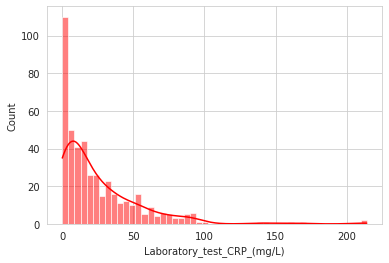

In [ ]:
sns.histplot(df['Laboratory_test_CRP_(mg/L)'],bins=50,kde=True,color='r')

In [ ]:
#replacing null values with random values between 1 to 10
import random
for i in df.index[df['Laboratory_test_CRP_(mg/L)'].isnull()].tolist():
  n = random.randint(1,10)
  df['Laboratory_test_CRP_(mg/L)'].iloc[i] = n


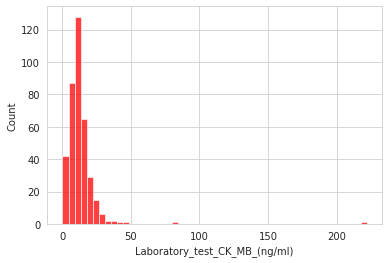

In [ ]:
sns.histplot(df['Laboratory_test_CK_MB_(ng/ml)'],bins=50,color='r')

In [ ]:
df[df['Laboratory_test_CK_MB_(ng/ml)']==df['Laboratory_test_CK_MB_(ng/ml)'].max()]

Severity   Age  Gender  ...  Laboratory_test_SCr_(umol/L)     CK   O2%
471       0.0  64.0     0.0  ...                          66.2  185.2  98.0

[1 rows x 34 columns]

In [ ]:
df['Laboratory_test_CK_MB_(ng/ml)'][471] = df['Laboratory_test_CK_MB_(ng/ml)'].median()

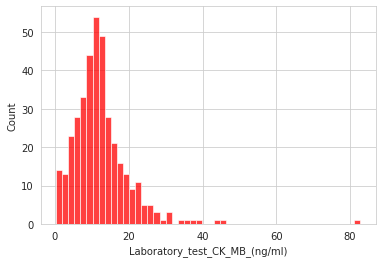

In [ ]:
sns.histplot(df['Laboratory_test_CK_MB_(ng/ml)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_CK_MB_(ng/ml)'].fillna(df['Laboratory_test_CK_MB_(ng/ml)'].median(),inplace=True)
#replaced with median since skewed

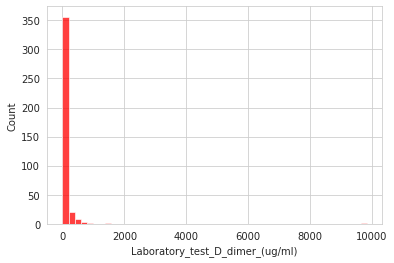

In [ ]:
sns.histplot(df['Laboratory_test_D_dimer_(ug/ml)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_D_dimer_(ug/ml)'] = df['Laboratory_test_D_dimer_(ug/ml)'][(df['Laboratory_test_D_dimer_(ug/ml)']>100)]/1000

In [ ]:
df['Laboratory_test_D_dimer_(ug/ml)'].fillna(df['Laboratory_test_D_dimer_(ug/ml)'].median(),inplace=True)
#replaced with median since skewed

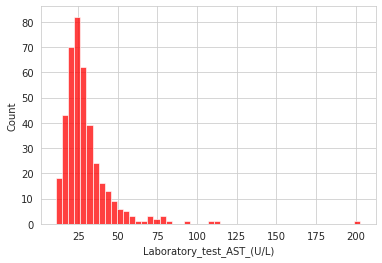

In [ ]:
sns.histplot(df['Laboratory_test_AST_(U/L)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_AST_(U/L)'].fillna(df['Laboratory_test_AST_(U/L)'].median(),inplace=True)
#replaced with median since skewed

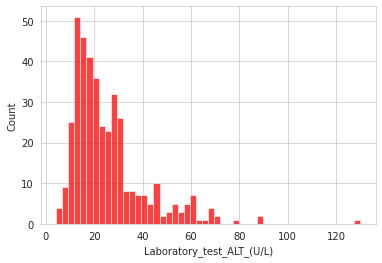

In [ ]:
sns.histplot(df['Laboratory_test_ALT_(U/L)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_ALT_(U/L)'].fillna(df['Laboratory_test_ALT_(U/L)'].median(),inplace=True)
#replaced with median since skewed

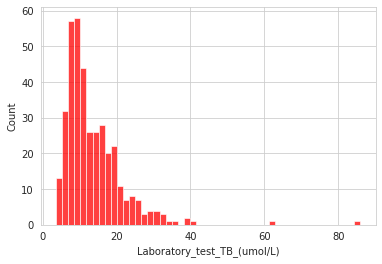

In [ ]:
sns.histplot(df['Laboratory_test_TB_(umol/L)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_TB_(umol/L)'].fillna(df['Laboratory_test_TB_(umol/L)'].median(),inplace=True)
#replaced with median since skewed

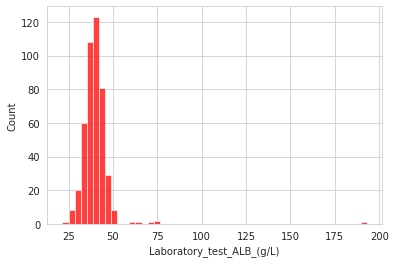

In [ ]:
sns.histplot(df['Laboratory_test_ALB_(g/L)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_ALB_(g/L)'].fillna(df['Laboratory_test_ALB_(g/L)'].median(),inplace=True)
#replaced with median since skewed

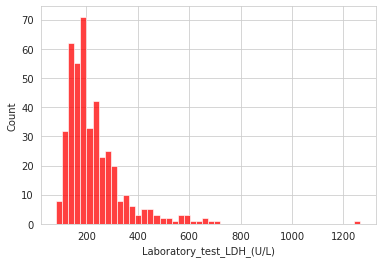

In [ ]:
sns.histplot(df['Laboratory_test_LDH_(U/L)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_LDH_(U/L)'].fillna(df['Laboratory_test_LDH_(U/L)'].median(),inplace=True)
#replaced with median since skewed

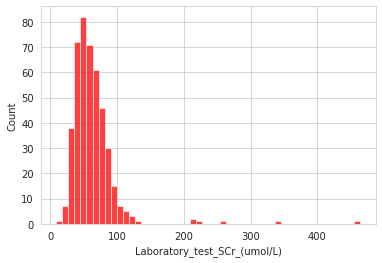

In [ ]:
sns.histplot(df['Laboratory_test_SCr_(umol/L)'],bins=50,color='r')

In [ ]:
df['Laboratory_test_SCr_(umol/L)'].median() #dhruv

56.48

In [ ]:
df['Laboratory_test_SCr_(umol/L)'][(df['Laboratory_test_SCr_(umol/L)']>200)] = df['Laboratory_test_SCr_(umol/L)'].median()

In [ ]:
df['Laboratory_test_SCr_(umol/L)'].fillna(df['Laboratory_test_SCr_(umol/L)'].median(),inplace=True)

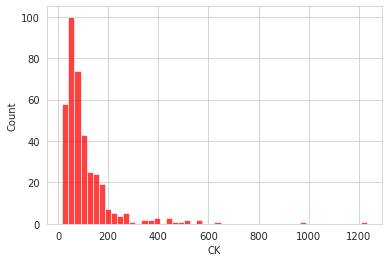

In [ ]:
sns.histplot(df['CK'],bins=50,color='r')

In [ ]:
df['CK'][(df['CK']>800)] = df['CK'].median()

In [ ]:
df['CK'].fillna(df['CK'].median(),inplace=True)

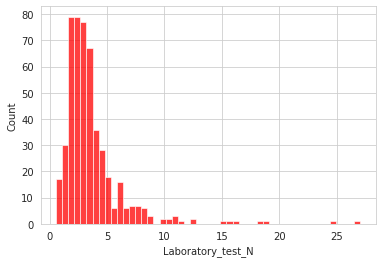

In [ ]:
sns.histplot(df['Laboratory_test_N'],bins=50,color='r') #1.5 to 8. less than 0.5 dangerous

In [ ]:
df['Laboratory_test_N'].fillna(df['Laboratory_test_N'].median(),inplace=True)

In [ ]:
df.isna().sum()

Severity                                                    0
Age                                                         0
Gender                                                      2
Underlying_comorbidities_Hypertension                       0
Underlying_comorbidities_Endocrine_disease                  0
Underlying_comorbidities_CVD                                0
Underlying_comorbidities_Chronic_Lung_disease               0
Underlying_comorbidities_Digestive_Disease                  0
Underlying_comorbidities_Renal_disease                      0
Underlying_comorbidities_Tumor                              0
Underlying_comorbidities_Cerebrovascular/Nervous_Disease    0
Underlying_comorbidities_Immune_disorder                    0
Underlying_comorbidities_Others                             0
Symptoms_Fever                                              0
Symptoms_Cough                                              0
Symptoms_Dyspnea                                            0
Symptoms

In [ ]:
df.describe()

Severity         Age  ...          CK         O2%
count  601.000000  601.000000  ...  601.000000  601.000000
mean     0.252912   47.630616  ...   94.394942   96.740366
std      0.435043   15.597863  ...   75.835351    8.372386
min      0.000000    0.000000  ...   17.000000    0.940000
25%      0.000000   35.000000  ...   64.200000   98.000000
50%      0.000000   47.000000  ...   75.900000   98.000000
75%      1.000000   60.000000  ...   89.400000   98.000000
max      1.000000   84.000000  ...  646.000000  100.000000

[8 rows x 34 columns]

In [ ]:
#completed filling missing values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import copy
df_b4norm = copy.deepcopy(df)
scaler = MinMaxScaler()
print(scaler.fit(df))
df=pd.DataFrame(scaler.transform(df),columns=df.columns)
df

MinMaxScaler(copy=True, feature_range=(0, 1))


Severity       Age  ...        CK      O2%
0         0.0  0.476190  ...  0.093641  0.97981
1         0.0  0.880952  ...  0.093641  0.97981
2         0.0  0.869048  ...  0.093641  0.97981
3         1.0  0.785714  ...  0.093641  0.97981
4         1.0  0.797619  ...  0.093641  0.97981
..        ...       ...  ...       ...      ...
596       0.0  0.559524  ...  0.085851  0.97981
597       0.0  0.369048  ...  0.064388  0.97981
598       0.0  0.416667  ...  0.038633  0.97981
599       0.0  0.488095  ...  0.009062  0.97981
600       0.0  0.773810  ...  0.073450  0.97981

[601 rows x 34 columns]

In [ ]:
df_b4norm.isna().sum()

Severity                                                    0
Age                                                         0
Gender                                                      2
Underlying_comorbidities_Hypertension                       0
Underlying_comorbidities_Endocrine_disease                  0
Underlying_comorbidities_CVD                                0
Underlying_comorbidities_Chronic_Lung_disease               0
Underlying_comorbidities_Digestive_Disease                  0
Underlying_comorbidities_Renal_disease                      0
Underlying_comorbidities_Tumor                              0
Underlying_comorbidities_Cerebrovascular/Nervous_Disease    0
Underlying_comorbidities_Immune_disorder                    0
Underlying_comorbidities_Others                             0
Symptoms_Fever                                              0
Symptoms_Cough                                              0
Symptoms_Dyspnea                                            0
Symptoms

Feature Subset Selection

In [ ]:
df.head()

Severity       Age  Gender  ...  Laboratory_test_SCr_(umol/L)        CK      O2%
0       0.0  0.476190     0.0  ...                      0.401347  0.093641  0.97981
1       0.0  0.880952     0.0  ...                      0.401347  0.093641  0.97981
2       0.0  0.869048     0.0  ...                      0.401347  0.093641  0.97981
3       1.0  0.785714     0.0  ...                      0.401347  0.093641  0.97981
4       1.0  0.797619     1.0  ...                      0.401347  0.093641  0.97981

[5 rows x 34 columns]

In [ ]:
corr = df.corr()

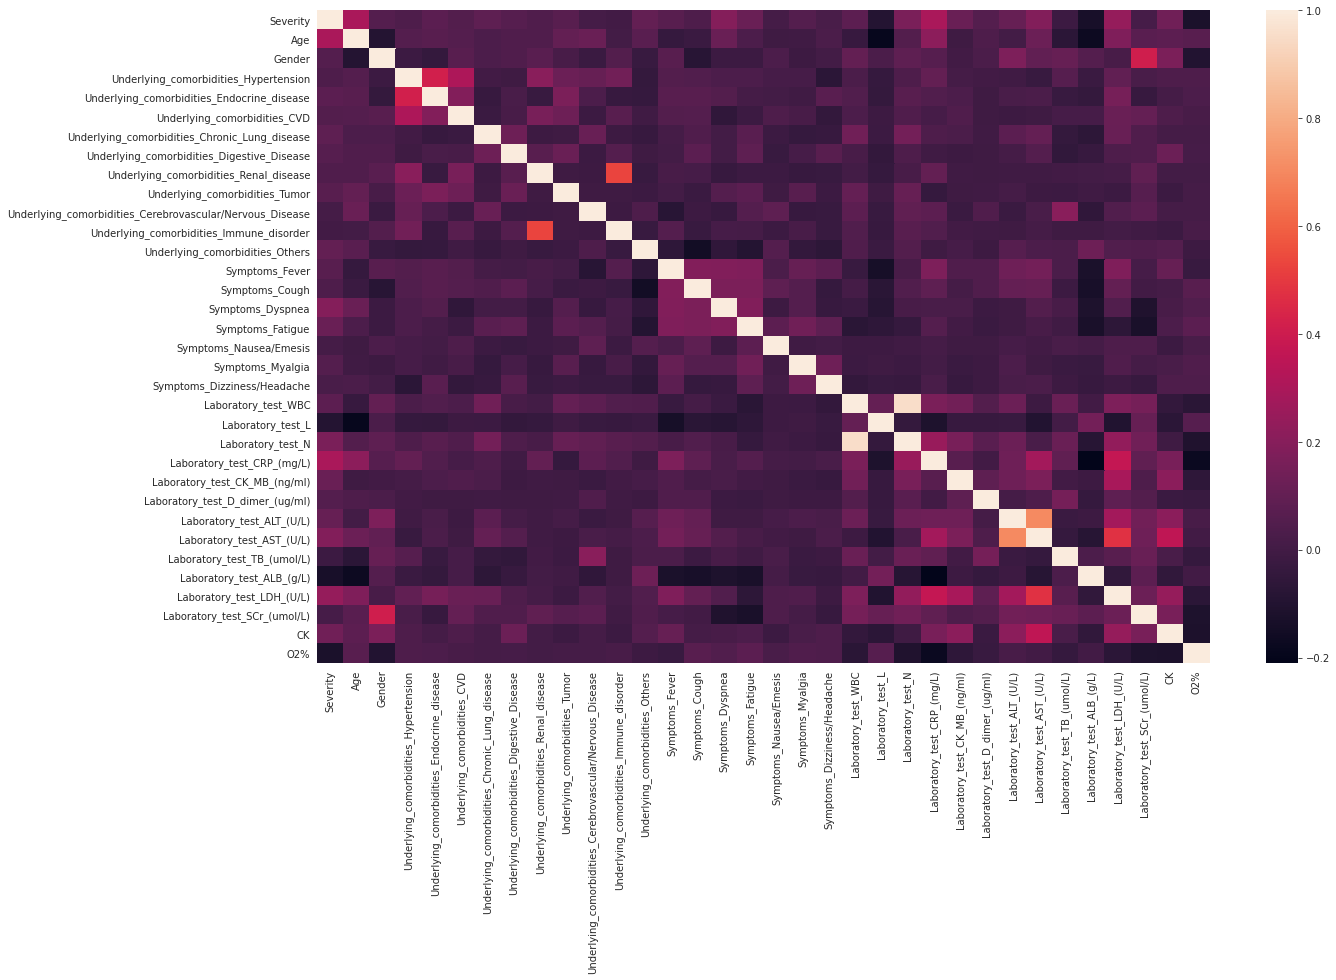

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr)

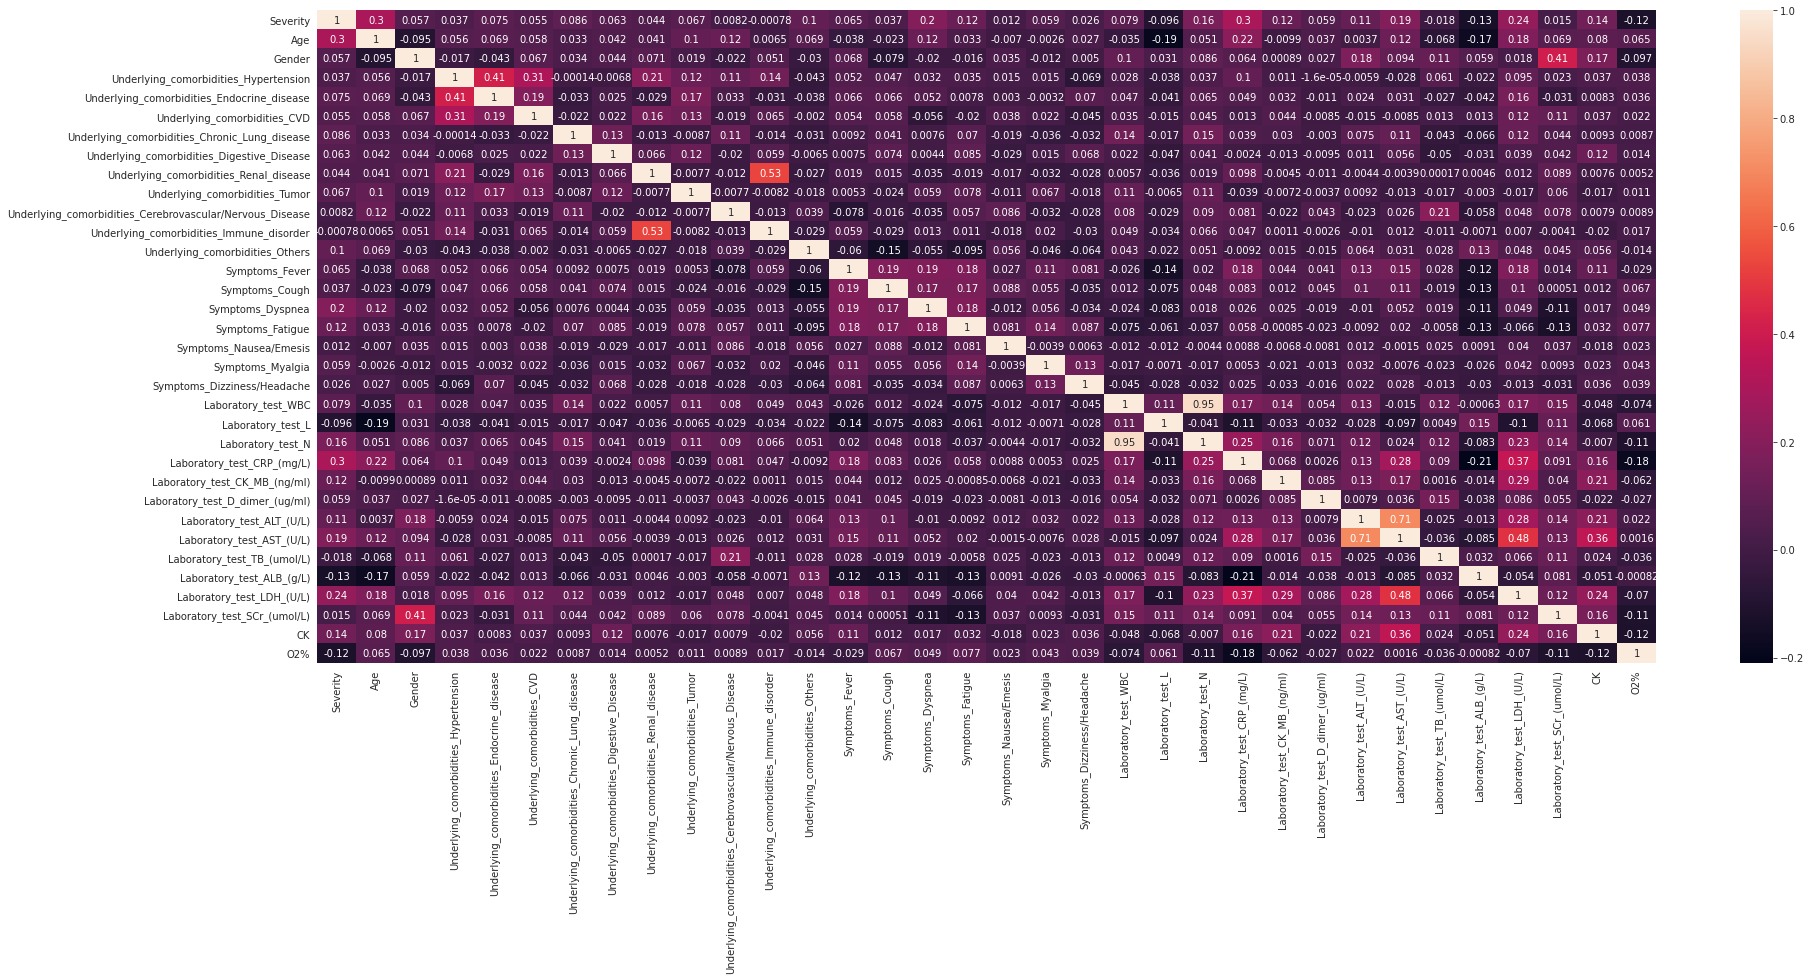

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,12))
sns.heatmap(corr,annot=True)

In [ ]:
(corr.iloc[0])

Severity                                                    1.000000
Age                                                         0.296982
Gender                                                      0.056885
Underlying_comorbidities_Hypertension                       0.037155
Underlying_comorbidities_Endocrine_disease                  0.074998
Underlying_comorbidities_CVD                                0.054966
Underlying_comorbidities_Chronic_Lung_disease               0.085846
Underlying_comorbidities_Digestive_Disease                  0.062782
Underlying_comorbidities_Renal_disease                      0.043869
Underlying_comorbidities_Tumor                              0.067419
Underlying_comorbidities_Cerebrovascular/Nervous_Disease    0.008192
Underlying_comorbidities_Immune_disorder                   -0.000778
Underlying_comorbidities_Others                             0.100491
Symptoms_Fever                                              0.064610
Symptoms_Cough                    

In [ ]:
corr.iloc[0][corr.iloc[0]>0.1] #11

Severity                           1.000000
Age                                0.296982
Underlying_comorbidities_Others    0.100491
Symptoms_Dyspnea                   0.195381
Symptoms_Fatigue                   0.118060
Laboratory_test_N                  0.164644
Laboratory_test_CRP_(mg/L)         0.296866
Laboratory_test_CK_MB_(ng/ml)      0.118611
Laboratory_test_ALT_(U/L)          0.106970
Laboratory_test_AST_(U/L)          0.191954
Laboratory_test_LDH_(U/L)          0.241327
CK                                 0.136255
Name: Severity, dtype: float64

In [ ]:
# draw a bar plot

In [ ]:
df1 = pd.Series(corr.iloc[0][corr.iloc[0]>0.1])

In [ ]:
df1 = df1[1:]

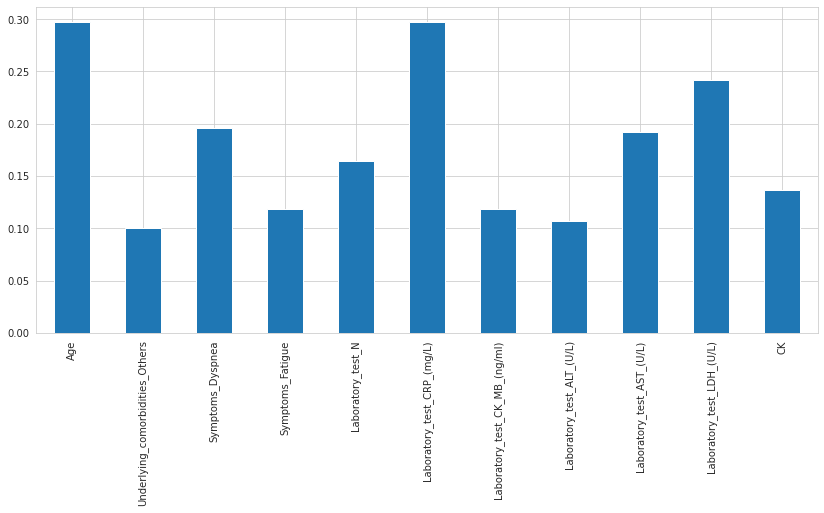

In [ ]:
df1.plot.bar(figsize=(14,6)) #add labels and put this graph

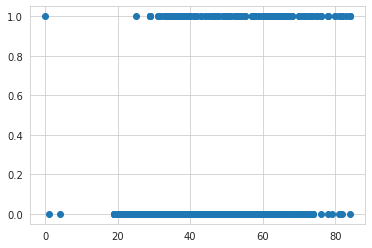

In [ ]:
plt.scatter(df_b4norm['Age'],df_b4norm['Severity'])

In [ ]:
#mutual information

In [ ]:
df2=df[['Age','Underlying_comorbidities_Others','Symptoms_Dyspnea','Symptoms_Fatigue','Laboratory_test_N','Laboratory_test_CRP_(mg/L)','Laboratory_test_CK_MB_(ng/ml)',
        'Laboratory_test_ALT_(U/L)','Laboratory_test_AST_(U/L)','Laboratory_test_LDH_(U/L)','CK']]
df2

Age  ...        CK
0    0.476190  ...  0.093641
1    0.880952  ...  0.093641
2    0.869048  ...  0.093641
3    0.785714  ...  0.093641
4    0.797619  ...  0.093641
..        ...  ...       ...
596  0.559524  ...  0.085851
597  0.369048  ...  0.064388
598  0.416667  ...  0.038633
599  0.488095  ...  0.009062
600  0.773810  ...  0.073450

[601 rows x 11 columns]

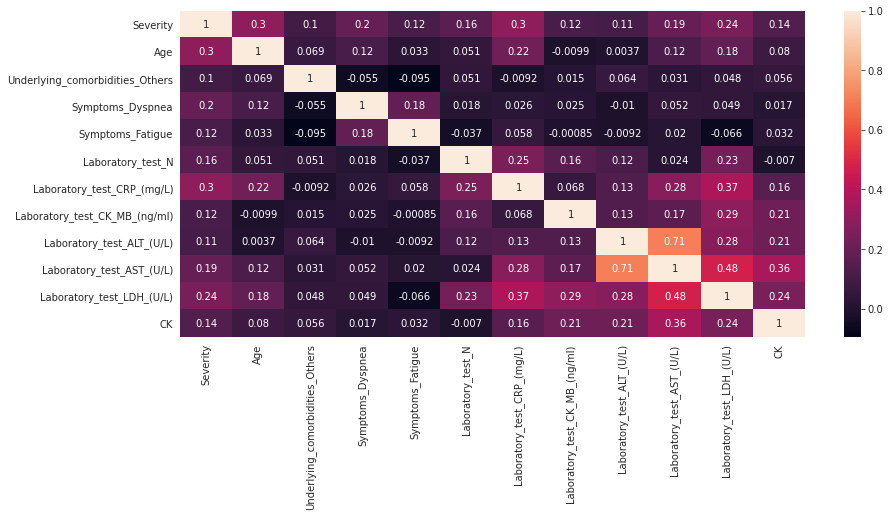

In [ ]:
pqr=df[['Severity','Age','Underlying_comorbidities_Others','Symptoms_Dyspnea','Symptoms_Fatigue','Laboratory_test_N','Laboratory_test_CRP_(mg/L)','Laboratory_test_CK_MB_(ng/ml)',
        'Laboratory_test_ALT_(U/L)','Laboratory_test_AST_(U/L)','Laboratory_test_LDH_(U/L)','CK']]
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.heatmap(pqr.corr(),annot=True)

In [ ]:
df['Severity'].unique()

array([0., 1.])

In [ ]:
X=df2
y=df['Severity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03158556, 0.00406664, 0.02424181, 0.        , 0.03882958,
       0.07384707, 0.03699739, 0.00858592, 0.01452685, 0.00614243,
       0.00679233])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info

Age                                0.031586
Underlying_comorbidities_Others    0.004067
Symptoms_Dyspnea                   0.024242
Symptoms_Fatigue                   0.000000
Laboratory_test_N                  0.038830
Laboratory_test_CRP_(mg/L)         0.073847
Laboratory_test_CK_MB_(ng/ml)      0.036997
Laboratory_test_ALT_(U/L)          0.008586
Laboratory_test_AST_(U/L)          0.014527
Laboratory_test_LDH_(U/L)          0.006142
CK                                 0.006792
dtype: float64

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Laboratory_test_CRP_(mg/L)         0.073847
Laboratory_test_N                  0.038830
Laboratory_test_CK_MB_(ng/ml)      0.036997
Age                                0.031586
Symptoms_Dyspnea                   0.024242
Laboratory_test_AST_(U/L)          0.014527
Laboratory_test_ALT_(U/L)          0.008586
CK                                 0.006792
Laboratory_test_LDH_(U/L)          0.006142
Underlying_comorbidities_Others    0.004067
Symptoms_Fatigue                   0.000000
dtype: float64

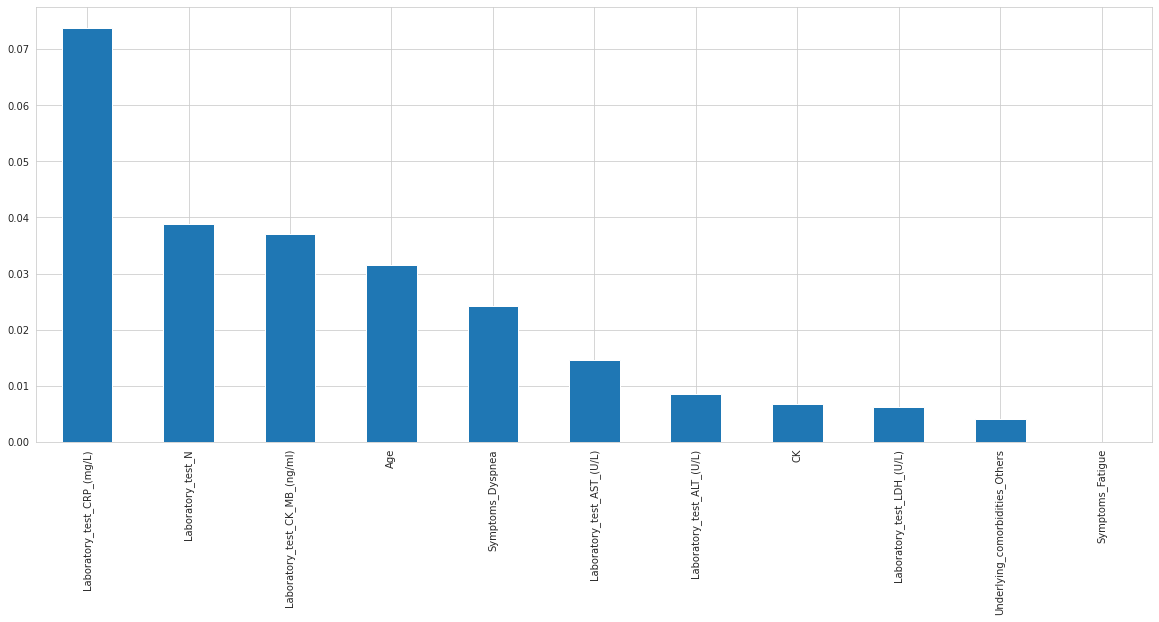

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8)) #add labels

In [ ]:
from sklearn.feature_selection import SelectKBest
five_best = SelectKBest(mutual_info_classif, k=7)
five_best.fit(X_train, y_train)
X_train.columns[five_best.get_support()]

Index(['Age', 'Underlying_comorbidities_Others', 'Laboratory_test_N',
       'Laboratory_test_CRP_(mg/L)', 'Laboratory_test_CK_MB_(ng/ml)',
       'Laboratory_test_ALT_(U/L)', 'Laboratory_test_AST_(U/L)'],
      dtype='object')

In [ ]:
df3 = df[['Severity','Age', 'Underlying_comorbidities_Others', 'Laboratory_test_N',
       'Laboratory_test_CRP_(mg/L)', 'Laboratory_test_AST_(U/L)',
       'Laboratory_test_LDH_(U/L)', 'CK']]

In [ ]:
df3.dtypes

Severity                           float64
Age                                float64
Underlying_comorbidities_Others    float64
Laboratory_test_N                  float64
Laboratory_test_CRP_(mg/L)         float64
Laboratory_test_AST_(U/L)          float64
Laboratory_test_LDH_(U/L)          float64
CK                                 float64
dtype: object

In [ ]:
model_acc = {}

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
X = df3.drop(['Severity'],axis = 1) # Features
y = df3['Severity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
clf = DecisionTreeClassifier()


In [ ]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6795580110497238


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
df['Severity'].unique()

array([0., 1.])

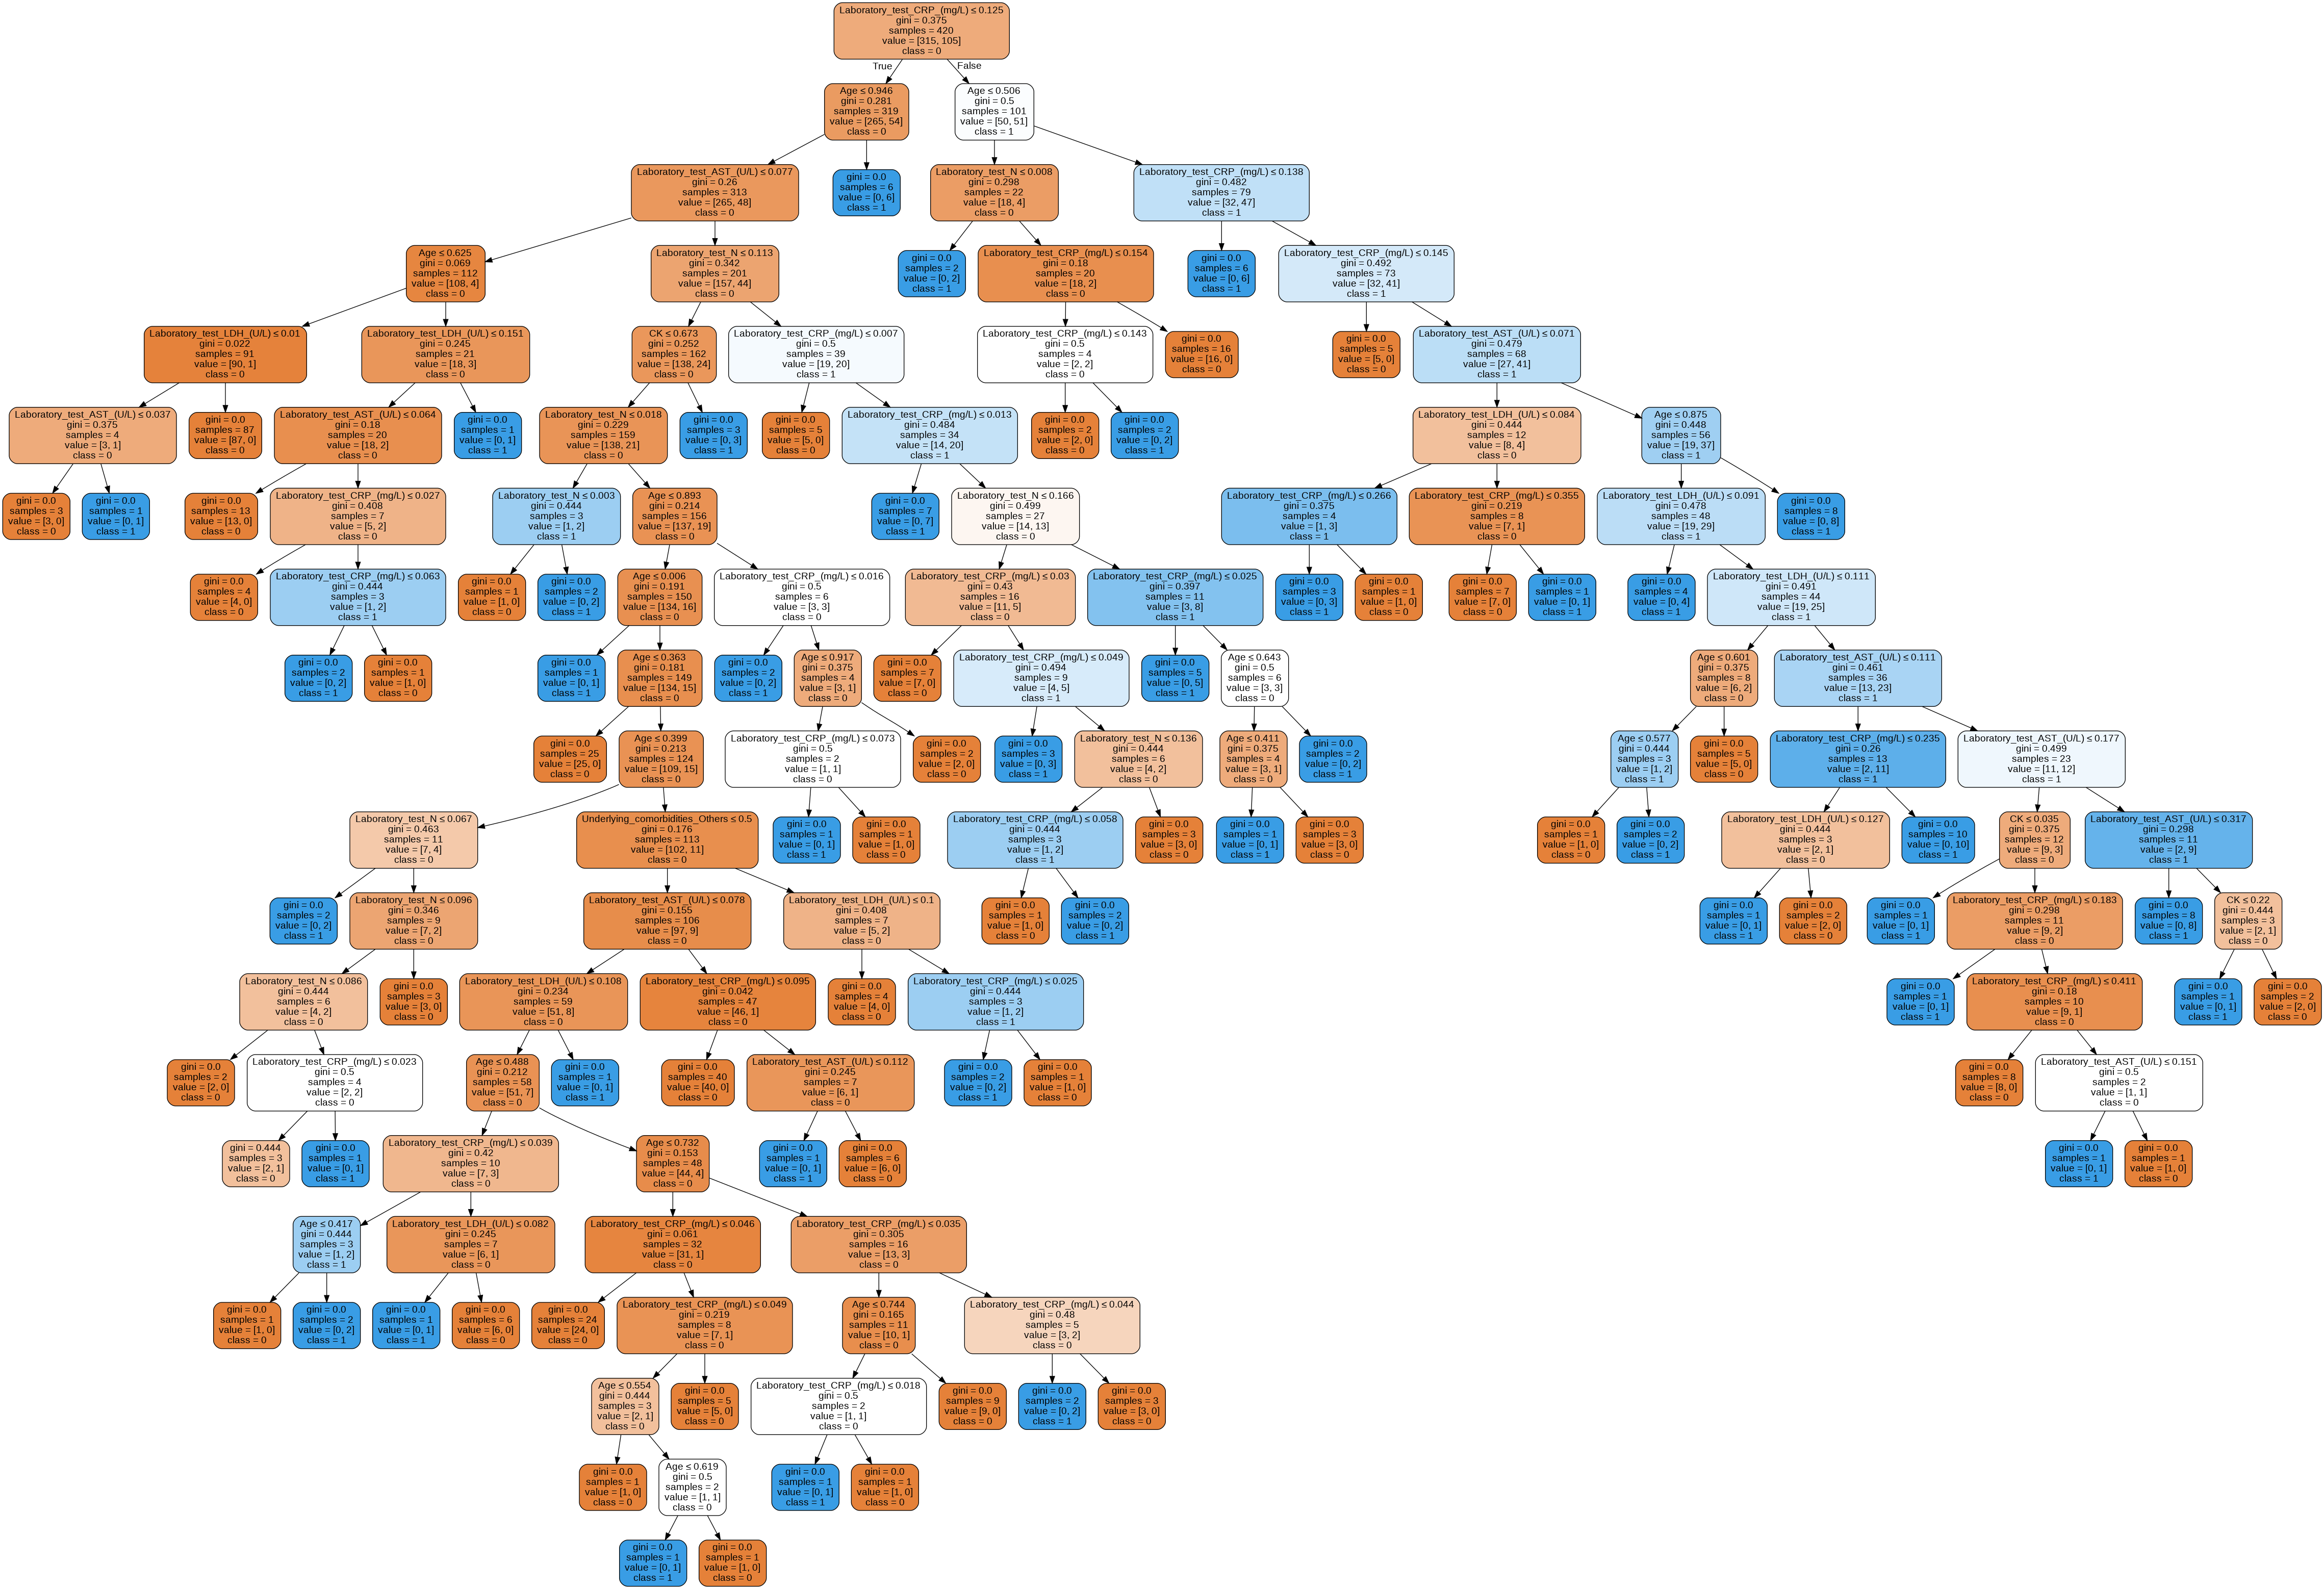

In [ ]:
feature_cols = ['Age', 'Underlying_comorbidities_Others', 'Laboratory_test_N','Laboratory_test_CRP_(mg/L)', 'Laboratory_test_AST_(U/L)','Laboratory_test_LDH_(U/L)', 'CK']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('covid19.png')
Image(graph.create_png())


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)

In [ ]:
clf = clf.fit(X_train,y_train)


In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7071823204419889


In [ ]:
model_acc['Decision Tree'] = (metrics.accuracy_score(y_test, y_pred))*100

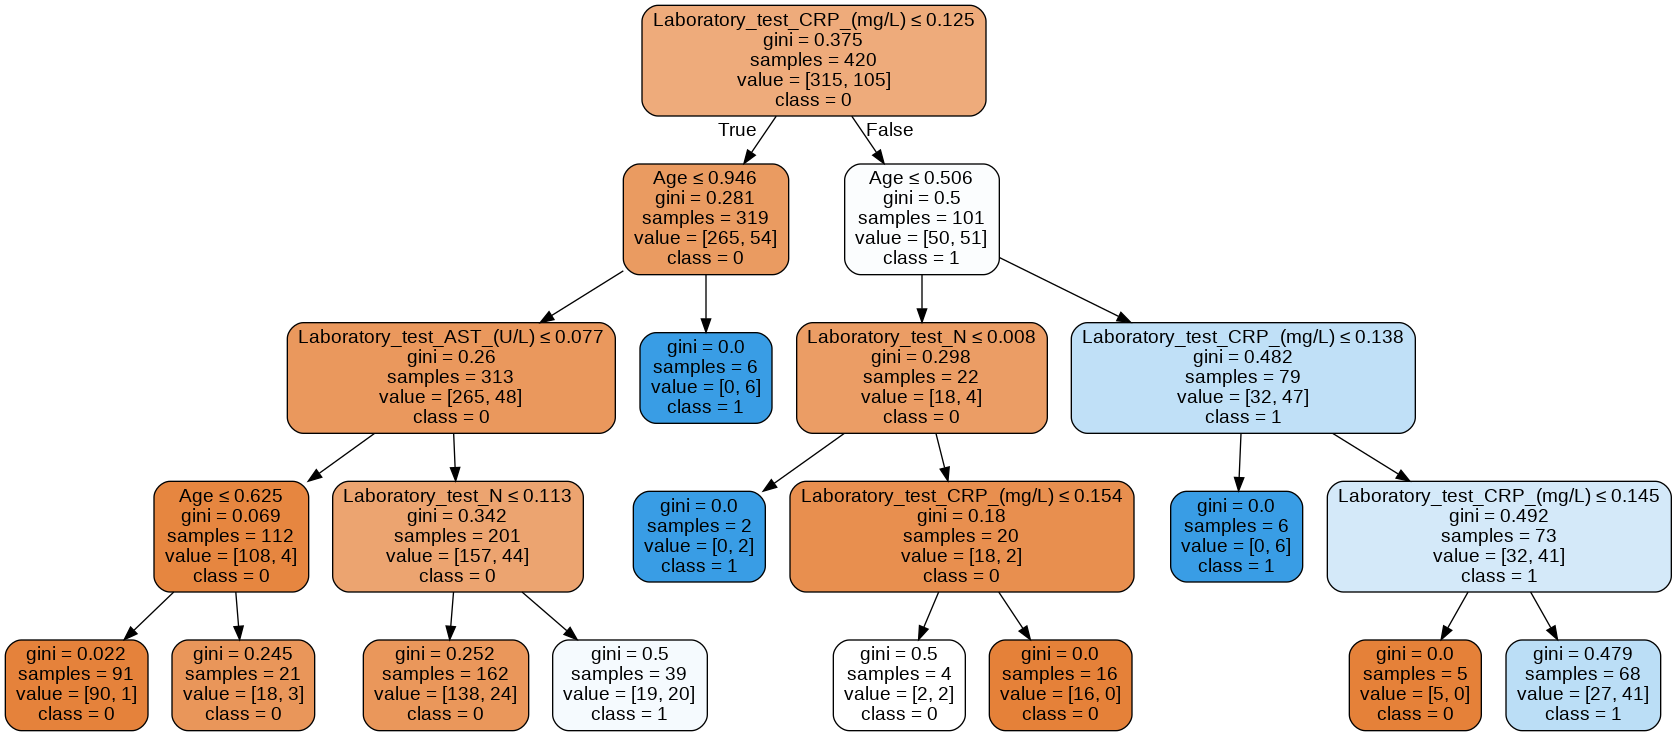

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('covid19.png')
Image(graph.create_png())

In [ ]:
l = []
for i in range(1,21):
  clf = DecisionTreeClassifier(criterion="gini", max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  l.append(metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7237569060773481
Accuracy: 0.7348066298342542
Accuracy: 0.7348066298342542
Accuracy: 0.7071823204419889
Accuracy: 0.7403314917127072
Accuracy: 0.7182320441988951
Accuracy: 0.7182320441988951
Accuracy: 0.6850828729281768
Accuracy: 0.7071823204419889
Accuracy: 0.7292817679558011
Accuracy: 0.7182320441988951
Accuracy: 0.6961325966850829
Accuracy: 0.6906077348066298
Accuracy: 0.7016574585635359
Accuracy: 0.6740331491712708
Accuracy: 0.6740331491712708
Accuracy: 0.6519337016574586
Accuracy: 0.6629834254143646
Accuracy: 0.6464088397790055
Accuracy: 0.6574585635359116


In [ ]:
l

[0.7237569060773481,
 0.7348066298342542,
 0.7348066298342542,
 0.7071823204419889,
 0.7403314917127072,
 0.7182320441988951,
 0.7182320441988951,
 0.6850828729281768,
 0.7071823204419889,
 0.7292817679558011,
 0.7182320441988951,
 0.6961325966850829,
 0.6906077348066298,
 0.7016574585635359,
 0.6740331491712708,
 0.6740331491712708,
 0.6519337016574586,
 0.6629834254143646,
 0.6464088397790055,
 0.6574585635359116]

In [ ]:
l_series=pd.Series(l,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
print(l_series)

1     0.723757
2     0.734807
3     0.734807
4     0.707182
5     0.740331
6     0.718232
7     0.718232
8     0.685083
9     0.707182
10    0.729282
11    0.718232
12    0.696133
13    0.690608
14    0.701657
15    0.674033
16    0.674033
17    0.651934
18    0.662983
19    0.646409
20    0.657459
dtype: float64


Text(0.5, 1.0, 'Accuracy vs Max depth')

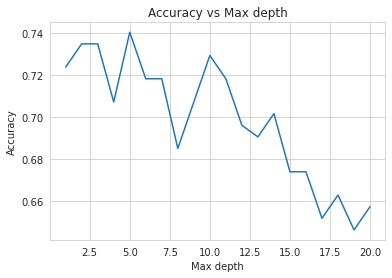

In [ ]:
l_series.plot.line() #plot properly #this part will come above
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max depth')

In [ ]:
#decison tree completed

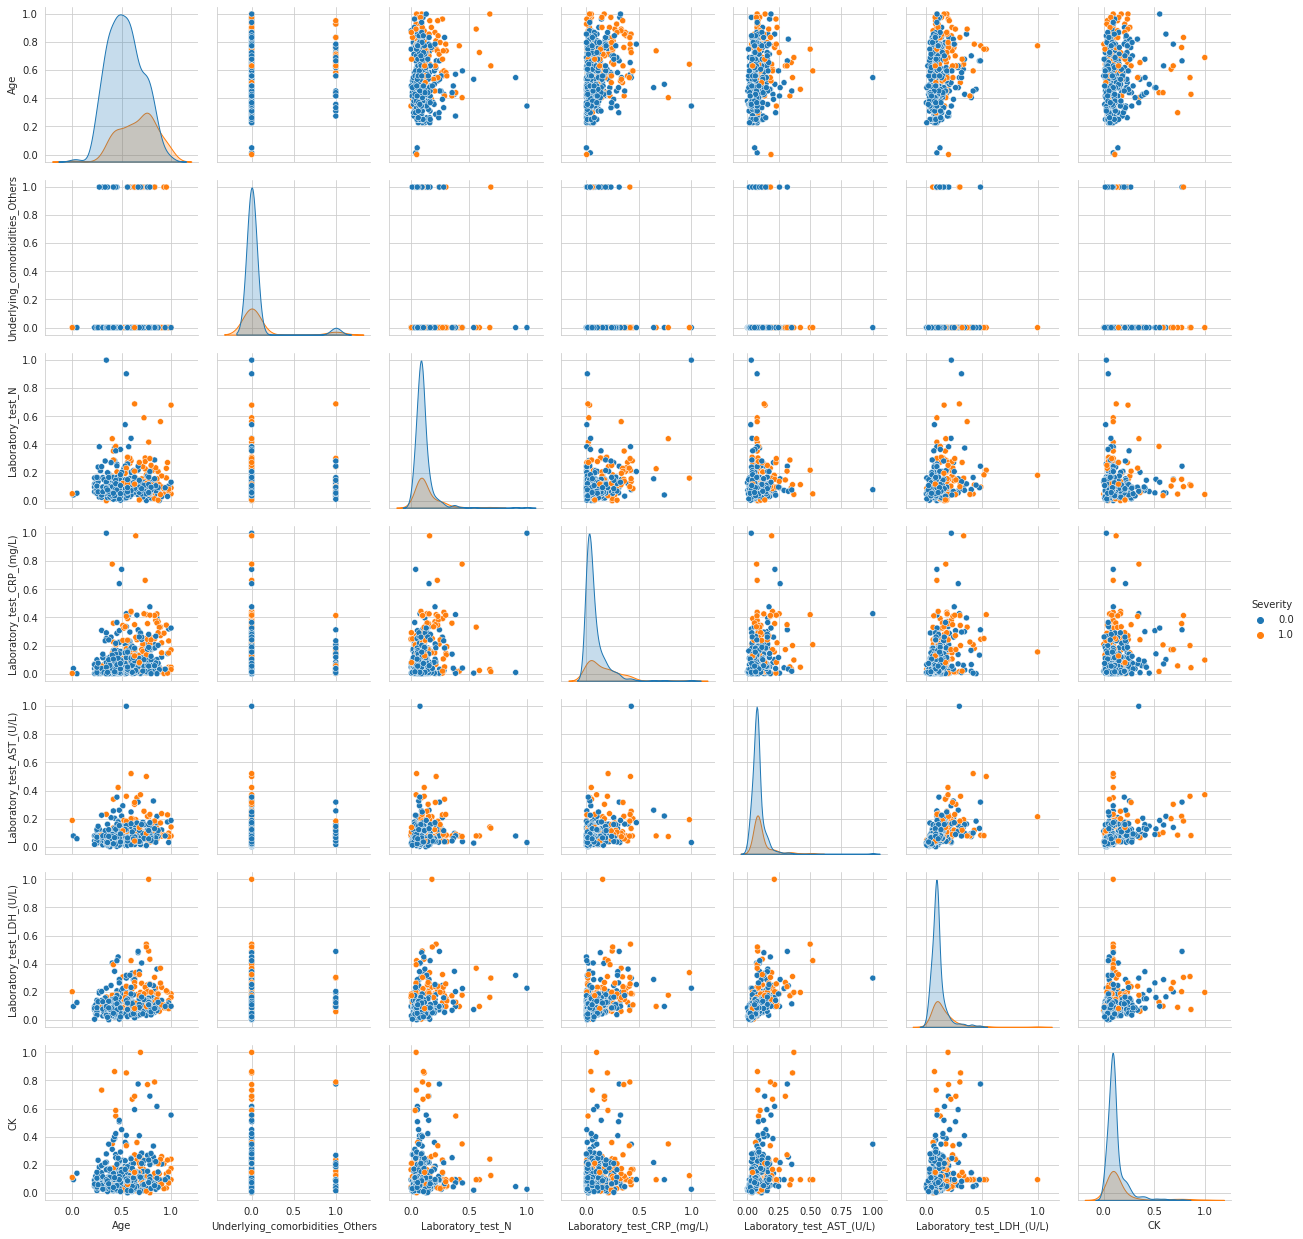

In [ ]:
sns.pairplot(df3,hue='Severity')

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,df3['Severity'],cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,df3['Severity'],cv=10)
    error_rate.append(1-score.mean())

In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Accuracy Rate')

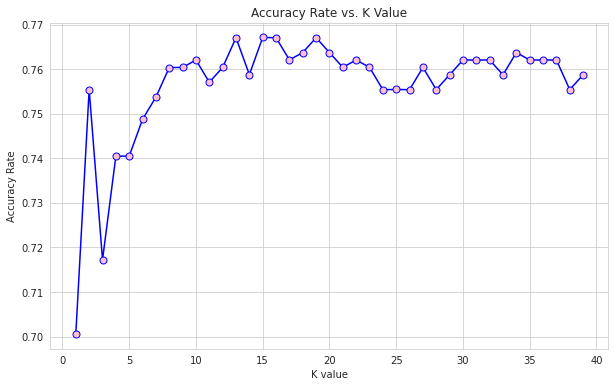

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='solid', marker='o',
         markerfacecolor='pink', markersize=7)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Accuracy Rate')

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[112  18]
 [ 35  16]]


              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       130
         1.0       0.47      0.31      0.38        51

    accuracy                           0.71       181
   macro avg       0.62      0.59      0.59       181
weighted avg       0.68      0.71      0.69       181



In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",knn.score(X_test,y_test))


Accuracy: 0.7071823204419889


In [ ]:

knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=6


[[128   2]
 [ 49   2]]


              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83       130
         1.0       0.50      0.04      0.07        51

    accuracy                           0.72       181
   macro avg       0.61      0.51      0.45       181
weighted avg       0.66      0.72      0.62       181



In [ ]:

knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[128   2]
 [ 49   2]]


              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83       130
         1.0       0.50      0.04      0.07        51

    accuracy                           0.72       181
   macro avg       0.61      0.51      0.45       181
weighted avg       0.66      0.72      0.62       181



In [ ]:

knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[128   2]
 [ 49   2]]


              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83       130
         1.0       0.50      0.04      0.07        51

    accuracy                           0.72       181
   macro avg       0.61      0.51      0.45       181
weighted avg       0.66      0.72      0.62       181



In [ ]:
from sklearn.metrics import f1_score

model_acc['KNN classifier'] = 78.00

#Naive Baye's

In [ ]:
# for i in range(0,len(df3)):
#   if df3.Age<18:


In [ ]:
df4=df3

In [ ]:
df4['Age']=pd.cut(df4.Age,bins=[0,18/83,60/83,1],labels=['Child','Adult','Elderly'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4['Age'].value_counts()

Adult      452
Elderly    146
Child        2
Name: Age, dtype: int64

In [ ]:
df4[df4['Age']=='Child']

Severity    Age  ...  Laboratory_test_LDH_(U/L)        CK
140       0.0  Child  ...                   0.095226  0.093641
205       0.0  Child  ...                   0.122940  0.139905

[2 rows x 8 columns]

In [ ]:
import sklearn
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
clf.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
clf.score(X_test,y_test)

0.7182320441988951

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 75.69060773480662


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = bnb.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy(in %): 72.37569060773481


In [ ]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
print("Categorical Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Categorical Naive Bayes model accuracy(in %): 72.37569060773481


In [ ]:
from sklearn.naive_bayes import ComplementNB
conb = ComplementNB()
conb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
print("Complement Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Complement Naive Bayes model accuracy(in %): 72.37569060773481


In [ ]:
#Naive bayes properly

In [ ]:
col_for_naive = df_b4norm[['Severity','Age', 'Underlying_comorbidities_Others', 'Laboratory_test_N',
       'Laboratory_test_CRP_(mg/L)', 'Laboratory_test_AST_(U/L)',
       'Laboratory_test_LDH_(U/L)', 'CK']]

In [ ]:
col_for_naive.head()
col_trial = copy.deepcopy(col_for_naive)

In [ ]:
col_trial.isna().sum()

Severity                           0
Age                                0
Underlying_comorbidities_Others    0
Laboratory_test_N                  0
Laboratory_test_CRP_(mg/L)         0
Laboratory_test_AST_(U/L)          0
Laboratory_test_LDH_(U/L)          0
CK                                 0
dtype: int64

In [ ]:
col_trial['Age']=pd.cut(col_trial.Age,bins=[col_trial['Age'].min()-1,18,60,col_trial['Age'].max()+1],labels=['0','1','2'])
#0:Child
#1:Adult
#2:Elderly

In [ ]:
col_trial.head()

Severity Age  ...  Laboratory_test_LDH_(U/L)    CK
0       0.0   1  ...                      195.2  75.9
1       0.0   2  ...                      195.2  75.9
2       0.0   2  ...                      195.2  75.9
3       1.0   2  ...                      195.2  75.9
4       1.0   2  ...                      195.2  75.9

[5 rows x 8 columns]

In [ ]:
col_trial['Laboratory_test_N']=pd.cut(col_trial.Laboratory_test_N,bins=[col_trial['Laboratory_test_N'].min()-1,1.5,8,col_trial['Laboratory_test_N'].max()+1],labels=['0','1','2'])

#0:Low
#1:Normal
#2:High

In [ ]:
col_trial['Laboratory_test_CRP_(mg/L)']=pd.cut(col_trial['Laboratory_test_CRP_(mg/L)'],bins=[col_trial['Laboratory_test_CRP_(mg/L)'].min()-1,0,10,col_trial['Laboratory_test_CRP_(mg/L)'].max()+1],labels=['0','1','2'])

#0:Low
#1:Normal
#2:High

In [ ]:
col_trial['Laboratory_test_AST_(U/L)']=pd.cut(col_trial['Laboratory_test_AST_(U/L)'],bins=[col_trial['Laboratory_test_AST_(U/L)'].min()-1,12,40,col_trial['Laboratory_test_AST_(U/L)'].max()+1],labels=['0','1','2'])

#0:Low
#1:Normal
#2:High

In [ ]:
col_trial['Laboratory_test_LDH_(U/L)']=pd.cut(col_trial['Laboratory_test_LDH_(U/L)'],bins=[col_trial['Laboratory_test_LDH_(U/L)'].min()-1,140,280,col_trial['Laboratory_test_LDH_(U/L)'].max()+1],labels=['0','1','2'])

#0:Low
#1:Normal
#2:High

In [ ]:
col_trial['CK']=pd.cut(col_trial.CK,bins=[col_trial['CK'].min()-1,22,198,col_trial['CK'].max()+1],labels=['0','1','2'])

#0:Low
#1:Normal
#2:High

In [ ]:
col_trial.head(10)

Severity Age  ...  Laboratory_test_LDH_(U/L) CK
0       0.0   1  ...                          1  1
1       0.0   2  ...                          1  1
2       0.0   2  ...                          1  1
3       1.0   2  ...                          1  1
4       1.0   2  ...                          1  1
5       0.0   2  ...                          2  1
6       0.0   2  ...                          1  1
7       0.0   1  ...                          1  1
8       0.0   2  ...                          1  1
9       0.0   1  ...                          1  1

[10 rows x 8 columns]

In [ ]:
# col_trial.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(col_trial.drop(columns=['Severity']),col_trial['Severity'],test_size=0.3,random_state=1)

In [ ]:
X_test

Age  Underlying_comorbidities_Others  ... Laboratory_test_LDH_(U/L) CK
446   1                              0.0  ...                         1  1
404   1                              0.0  ...                         1  1
509   2                              1.0  ...                         1  1
455   1                              0.0  ...                         0  1
201   1                              0.0  ...                         1  1
..   ..                              ...  ...                       ... ..
567   1                              0.0  ...                         1  1
529   2                              0.0  ...                         1  2
261   1                              0.0  ...                         1  1
386   2                              0.0  ...                         1  1
241   1                              0.0  ...                         1  1

[181 rows x 7 columns]

In [ ]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)
print("Cat Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
model_acc['CategoricalNB'] = metrics.accuracy_score(y_test, y_pred)*100

Cat Naive Bayes model accuracy(in %): 78.45303867403315


In [ ]:
# y_pred

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Multi Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
model_acc['MultinomialNB'] = metrics.accuracy_score(y_test, y_pred)*100

Multi Naive Bayes model accuracy(in %): 74.03314917127072


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Gauss Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
model_acc['GaussianNB'] = metrics.accuracy_score(y_test, y_pred)*100

Gauss Naive Bayes model accuracy(in %): 76.79558011049724


In [ ]:
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.])

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Ber Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
model_acc['BernoulliNB'] = metrics.accuracy_score(y_test, y_pred)*100

Ber Naive Bayes model accuracy(in %): 74.03314917127072


In [ ]:
from sklearn.naive_bayes import ComplementNB
cmnb = ComplementNB()
cmnb.fit(X_train, y_train)
y_pred = cmnb.predict(X_test)
print("Complement Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
model_acc['ComplementNB'] = metrics.accuracy_score(y_test, y_pred)*100

Complement Naive Bayes model accuracy(in %): 66.29834254143645


In [ ]:
#end of naive bayes

In [ ]:
X_ax = list(model_acc.keys())
y_ax = list(model_acc.values())

In [ ]:
X_ax

['Decision Tree',
 'KNN classifier',
 'CategoricalNB',
 'MultinomialNB',
 'GaussianNB',
 'BernoulliNB',
 'ComplementNB']

In [ ]:
X_ax = ['Decision Tree',
 'KNN classifier',
 'CategoricalNB',
 'GaussianNB',
 'BernoulliNB']

In [ ]:
y_ax

[70.71823204419888,
 78.0,
 78.45303867403315,
 74.03314917127072,
 76.79558011049724,
 74.03314917127072,
 66.29834254143645]

In [ ]:
y_ax = [73.4,
 76.0,
 78.45303867403315,
 76.79558011049724,
 74.03314917127072]

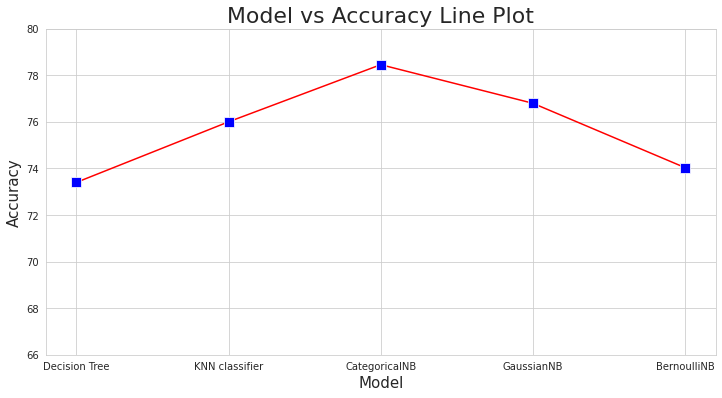

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.xlabel('Model',size=15)
plt.ylabel('Accuracy',size=15)
plt.ylim(66,80)
plt.title('Model vs Accuracy Line Plot',size=22)
sns.lineplot(x=X_ax,y=y_ax,style=1,markers=['s'],legend=False,color='red',markerfacecolor='blue',ms=10)
plt.savefig('model_comparison.png')

In [ ]:
#prediction
df_eg=pd.DataFrame([['1','0','1','2','1','1','1']],columns=X_test.columns)
cnb.predict(df_eg)

array([0.])

In [ ]:
col_for_naive.iloc[241]

Severity                             0.00
Age                                 20.00
Underlying_comorbidities_Others      0.00
Laboratory_test_N                    3.69
Laboratory_test_CRP_(mg/L)          11.50
Laboratory_test_AST_(U/L)           19.60
Laboratory_test_LDH_(U/L)          208.60
CK                                  92.53
Name: 241, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x1152 with 0 Axes>

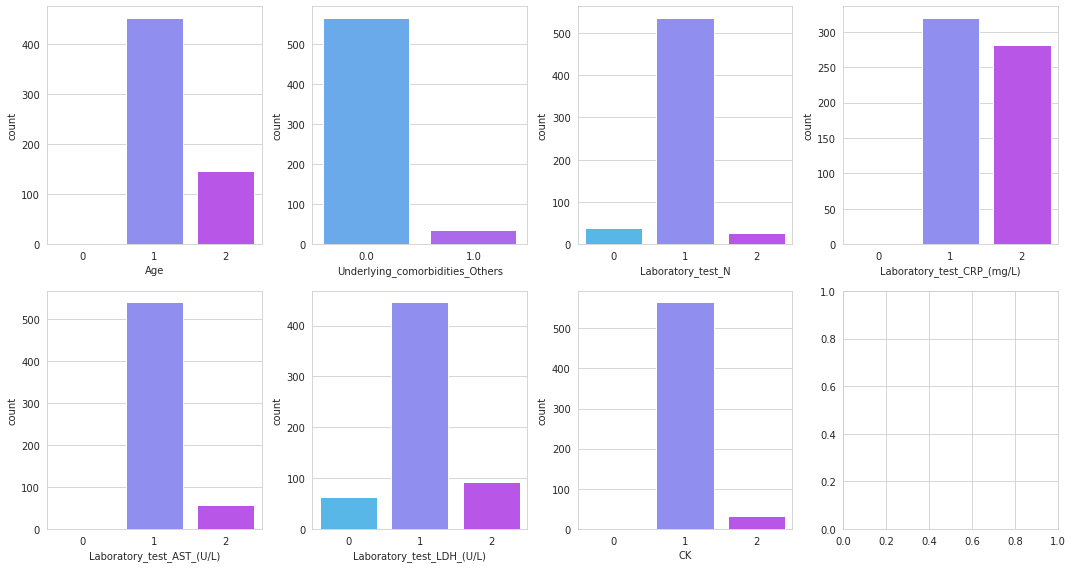

In [ ]:
#independent variables
plt.figure(figsize=(20,16))
fig, axes = plt.subplots(nrows=2,ncols=4,gridspec_kw={'width_ratios': [1,1,1,1],'height_ratios': [1,1]})
fig.set_figheight(8)
fig.set_figwidth(15)

sns.countplot(col_trial['Age'],ax=axes[0][0],palette='cool')
sns.countplot(col_trial['Underlying_comorbidities_Others'],ax=axes[0][1],palette='cool')
sns.countplot(col_trial['Laboratory_test_N'],ax=axes[0][2],palette='cool')
sns.countplot(col_trial['Laboratory_test_CRP_(mg/L)'],ax=axes[0][3],palette='cool')
sns.countplot(col_trial['Laboratory_test_AST_(U/L)'],ax=axes[1][0],palette='cool')
sns.countplot(col_trial['Laboratory_test_LDH_(U/L)'],ax=axes[1][1],palette='cool')
sns.countplot(col_trial['CK'],ax=axes[1][2],palette='cool')
# sns.countplot(col_trial['Age'],ax=axes[0][0])

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


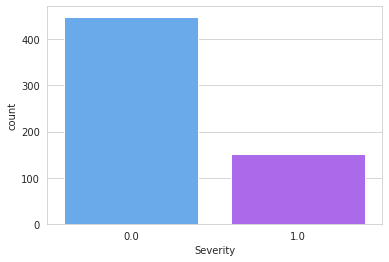

In [ ]:
#dependent variable
sns.countplot(col_trial['Severity'],palette='cool')

In [ ]:
df_severe = col_trial[col_trial["Severity"]==1]

In [ ]:
col_trial.dtypes

Severity                            float64
Age                                category
Underlying_comorbidities_Others     float64
Laboratory_test_N                  category
Laboratory_test_CRP_(mg/L)         category
Laboratory_test_AST_(U/L)          category
Laboratory_test_LDH_(U/L)          category
CK                                 category
dtype: object

In [ ]:
col_trial['Age'] = col_trial['Age'].astype('float64')
col_trial['Laboratory_test_N'] = col_trial['Laboratory_test_N'].astype('float64')
col_trial['Laboratory_test_CRP_(mg/L)'] = col_trial['Laboratory_test_CRP_(mg/L)'].astype('float64')
col_trial['Laboratory_test_AST_(U/L)'] = col_trial['Laboratory_test_AST_(U/L)'].astype('float64')
col_trial['Laboratory_test_LDH_(U/L)'] = col_trial['Laboratory_test_LDH_(U/L)'].astype('float64')
col_trial['CK'] = col_trial['CK'].astype('float64')

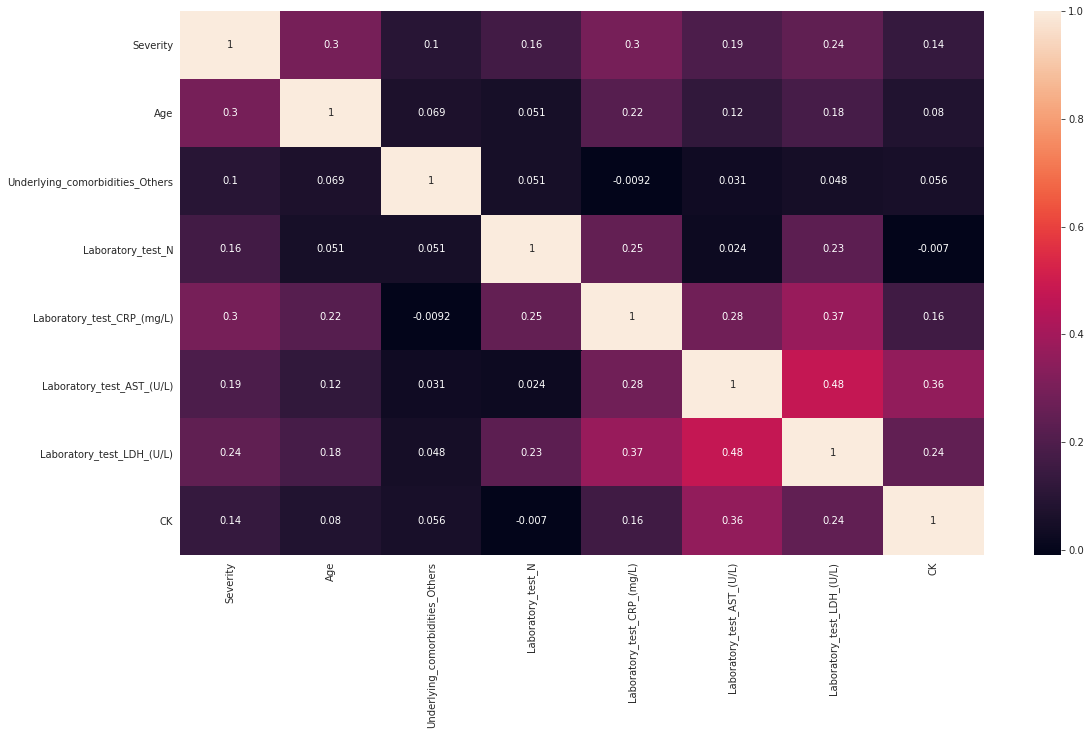

In [ ]:
corr = col_for_naive.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr,annot=True)

In [ ]:
df_correlation = pd.DataFrame(corr.iloc[0][1:])

In [ ]:
df_correlation

Severity
Age                              0.296982
Underlying_comorbidities_Others  0.100491
Laboratory_test_N                0.164644
Laboratory_test_CRP_(mg/L)       0.296866
Laboratory_test_AST_(U/L)        0.191954
Laboratory_test_LDH_(U/L)        0.241327
CK                               0.136255

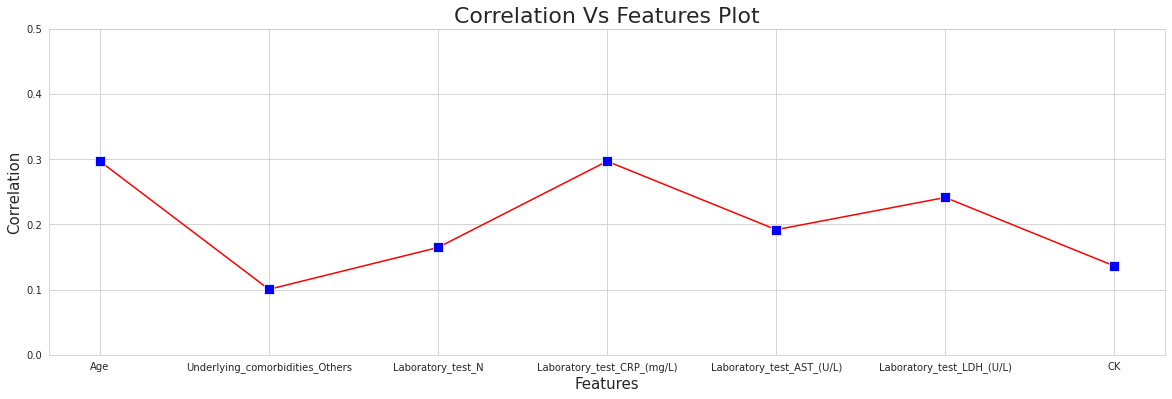

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
plt.xlabel('Features',size=15)
plt.ylabel('Correlation',size=15)
plt.ylim(0,0.5)
plt.title('Correlation Vs Features Plot',size=22)
sns.lineplot(x=df_correlation.index,y=df_correlation['Severity'],style=1,markers=['s'],legend=False,color='red',markerfacecolor='blue',ms=10)

In [ ]:
 #result
 col_for_naive.nlargest(5,['Severity','Laboratory_test_CRP_(mg/L)','Age','Laboratory_test_LDH_(U/L)','Laboratory_test_AST_(U/L)','Laboratory_test_N','CK','Underlying_comorbidities_Others'])

Severity   Age  ...  Laboratory_test_LDH_(U/L)     CK
269       1.0  54.0  ...                      480.0   94.0
257       1.0  34.0  ...                      290.0  236.0
124       1.0  62.0  ...                      195.2   75.9
388       1.0  50.0  ...                      208.8  121.8
163       1.0  50.0  ...                      300.0   75.9

[5 rows x 8 columns]